In [4]:
import os
local_dev =  "/workspace/BYU/notebooks" if "WANDB_API_KEY" in os.environ else "C:/Users/Freedomkwok2022/ML_Learn/BYU/notebooks"
yolo_dataset_dir = os.path.join(local_dev, 'yolo_dataset')
yolo_weights_dir = os.path.join(local_dev, 'yolo_weights')

from ultralytics import YOLO

## Yolo11 Model Reference

In [2]:
# Index	Value	Meaning
# 0	512	Input channels (from previous layer)
# 1	512	Output channels (after processing)
# 2	1	Number of sub-blocks inside the module
# 3	True	Whether to use residual/shortcut connection

# +-------+-------------+----------+-----------------------------------------------------------+-------------------------------+
# | Index | From        | Params   | Module                                                    | Arguments                     |
# +-------+-------------+----------+-----------------------------------------------------------+-------------------------------+
# |   0   | -1          |    1856  | ultralytics.nn.modules.conv.Conv                          | [3, 64, 3, 2]                 |
# |   1   | -1          |   73984  | ultralytics.nn.modules.conv.Conv                          | [64, 128, 3, 2]               |
# |   2   | -1          |  111872  | ultralytics.nn.modules.block.C3k2                         | [128, 256, 1, True, 0.25]     |
# |   3   | -1          |  590336  | ultralytics.nn.modules.conv.Conv                          | [256, 256, 3, 2]              |
# |   4   | -1          |  444928  | ultralytics.nn.modules.block.C3k2                         | [256, 512, 1, True, 0.25]     |
# |   5   | -1          | 2360320  | ultralytics.nn.modules.conv.Conv                          | [512, 512, 3, 2]              |
# |   6   | -1          | 1380352  | ultralytics.nn.modules.block.C3k2                         | [512, 512, 1, True]           |
# |   7   | -1          | 2360320  | ultralytics.nn.modules.conv.Conv                          | [512, 512, 3, 2]              |
# |   8   | -1          | 1380352  | ultralytics.nn.modules.block.C3k2                         | [512, 512, 1, True]           |
# |   9   | -1          |  656896  | ultralytics.nn.modules.block.SPPF                         | [512, 512, 5]                 |
# |  10   | -1          |  990976  | ultralytics.nn.modules.block.C2PSA                        | [512, 512, 1]                 |
# |  11   | -1          |       0  | torch.nn.modules.upsampling.Upsample                      | [None, 2, 'nearest']          |
# |  12   | [-1, 6]     |       0  | ultralytics.nn.modules.conv.Concat                        | [1]                           |
# |  13   | -1          | 1642496  | ultralytics.nn.modules.block.C3k2                         | [1024, 512, 1, True]          |
# |  14   | -1          |       0  | torch.nn.modules.upsampling.Upsample                      | [None, 2, 'nearest']          |
# |  15   | [-1, 4]     |       0  | ultralytics.nn.modules.conv.Concat                        | [1]                           |
# |  16   | -1          |  542720  | ultralytics.nn.modules.block.C3k2                         | [1024, 256, 1, True]          |
# |  17   | -1          |  590336  | ultralytics.nn.modules.conv.Conv                          | [256, 256, 3, 2]              |
# |  18   | [-1, 13]    |       0  | ultralytics.nn.modules.conv.Concat                        | [1]                           |
# |  19   | -1          | 1511424  | ultralytics.nn.modules.block.C3k2                         | [768, 512, 1, True]           |
# |  20   | -1          | 2360320  | ultralytics.nn.modules.conv.Conv                          | [512, 512, 3, 2]              |
# |  21   | [-1, 10]    |       0  | ultralytics.nn.modules.conv.Concat                        | [1]                           |
# |  22   | -1          | 1642496  | ultralytics.nn.modules.block.C3k2                         | [1024, 512, 1, True]          |
# |  23   | [16,19,22]  | 1411795  | ultralytics.nn.modules.head.Detect                        | [1, [256, 512, 512]]          |
# +-------+-------------+----------+-----------------------------------------------------------+-------------------------------+

In [ ]:
from torchinfo import summary
model_009_merge_159 = os.path.join(yolo_weights_dir, "3_yolo11s_shared_009_cleaned_248_80", "weights", "best.pt")
model = YOLO(model_009_merge_159)
summary(model.model, input_size=(1, 3, 640, 640), depth=5, verbose=1)

In [ ]:
# for i, m in enumerate(model.model.model):
#     print(f"{i:>3} | {m.__class__.__name__:>20} | {sum(p.numel() for p in m.parameters() if p.requires_grad):>8} params")
model_009_merge_159 = os.path.join(yolo_weights_dir, "motor_detector_shared_009_optuna_trial_147", "weights", "best.pt")
model = YOLO(model_009_merge_159)
from torchinfo import summary
summary(model.model, input_size=(1, 3, 640, 640), depth=5, verbose=1)

In [ ]:
import torch
from ultralytics import YOLO
model_009_merge_159 = os.path.join(yolo_weights_dir, "motor_detector_shared_009_optuna_trial_147", "weights", "best.pt")
model = YOLO(model_009_merge_159)

# Dictionary to store activations
activations = {}

def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

import matplotlib.pyplot as plt

def plot_feature_maps(feature_map, num_channels=1):
    fig, axes = plt.subplots(1, num_channels, figsize=(20, 5))
    for i in range(num_channels):
        axes[i].imshow(feature_map[0, i].cpu(), cmap='viridis')
        axes[i].axis('off')
    plt.show()

# Register hook to the desired layer
# Adjust the index based on the model's architecture
model.model.model[0].register_forward_hook(get_activation('layer0')) # ==>  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]

### Visualize the Feature Maps


image 1/1 C:\Users\Freedomkwok2022\ML_Learn\BYU\notebooks\yolo_dataset\images\shared_009\train\BYU_007_100_tomo_1ab322_z0066_y0580_x0590_w0928_h0960_r070.jpg: 512x512 1 motor, 6.0ms
Speed: 1.1ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 512)


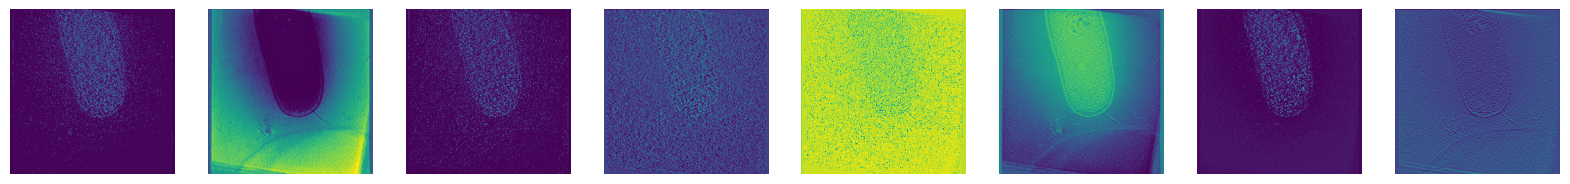

In [15]:


# Load and preprocess the image
sample_images = os.path.join( yolo_dataset_dir, "images","shared_009","train","BYU_007_100_tomo_1ab322_z0066_y0580_x0590_w0928_h0960_r070.jpg")
results = model(sample_images)
# Example: Visualize the first 8 channels from 'layer0'
plot_feature_maps(activations['layer0'], num_channels=8)

In [12]:
import math
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from ultralytics import YOLO
from matplotlib.cm import get_cmap

# === Grad-CAM computation function ===
def run_gradcam_on_layer(model, img_path, target_layer_idx=10, topk_channels=0):
    model.eval()
    backbone = model.model

    # Prepare hooks
    gradients = []
    activations = []

    def forward_hook(module, input, output):
        activations.append(output)

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    # Register hooks
    target_layer = backbone.model[target_layer_idx]
    target_layer.register_forward_hook(forward_hook)
    target_layer.register_full_backward_hook(backward_hook)

    # Load & preprocess image
    img = Image.open(img_path).convert("L").convert("RGB")
    preprocess = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor()
    ])
    input_tensor = preprocess(img).unsqueeze(0)
    input_tensor.requires_grad = True

    # Forward pass
    preds = backbone(input_tensor)[0]
    score = preds[..., 4].max()  # objectness
    backbone.zero_grad()
    score.backward()

    # Compute Grad-CAM
    grad = gradients[-1].squeeze(0)
    act = activations[-1].squeeze(0)
    weights = grad.mean(dim=(1, 2), keepdim=True)

    if topk_channels > 0:
        weights_flat = weights.view(-1)
        topk = torch.topk(weights_flat, topk_channels)
        cam = (weights[topk.indices][:, :, :] * act[topk.indices]).sum(dim=0)
    else:
        cam = (weights * act).sum(dim=0)

    cam = torch.relu(cam)
    cam -= cam.min()
    cam /= cam.max()
    cam = cam.detach().cpu().numpy()

    return cam

In [11]:
# That would include:
# Layer 1 through Layer 19, i.e., modules Conv, C3k2, SPPF, Upsample, Concat, etc.
# From your summary, layers 0–22 are backbone + neck.
# Layer 23 is the Detect head

import math
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.cm import get_cmap

# === Config ===
show_params = True  # Toggle to display param count in titles
layer_indices = range(1, 20)  # Layers to visualize
rows = 2
cols = math.ceil(len(layer_indices) / rows)
plt.figure(figsize=(18, 8))

# === Param counter helper ===
def count_params(module):
    return sum(p.numel() for p in module.parameters() if p.requires_grad)

# === Build metadata for layers ===
layer_meta = {}
for i, module in enumerate(model.model.model):
    layer_meta[i] = {
        "name": module.__class__.__name__,
        "params": count_params(module)
    }

# === Grad-CAM Visualization ===
for i, idx in enumerate(layer_indices):
    # Run Grad-CAM
    cam = run_gradcam_on_layer(model, sample_images, target_layer_idx=idx, topk_channels=30)
    cam_resized = cv2.resize(cam, (640, 640))

    # Create heatmap
    heatmap = get_cmap('jet')(cam_resized)[:, :, :3]
    heatmap = (heatmap * 255).astype(np.uint8)

    # Load and resize original image
    img = Image.open(sample_images).convert("RGB").resize((640, 640))
    img_np = np.array(img)
    overlay = (img_np * 0.5 + heatmap * 0.5).astype(np.uint8)

    # Title string
    layer_name = layer_meta[idx]["name"]
    param_count = layer_meta[idx]["params"]
    title = f"Layer {idx}: {layer_name}"
    if show_params:
        title += f"\nParams: {param_count:,}"

    # Plot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(overlay)
    plt.title(title, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()




AttributeError: 'Sequential' object has no attribute 'model'

<Figure size 1800x800 with 0 Axes>

### weights analysis on the top

In [ ]:
import math
import matplotlib.pyplot as plt

max_available = weights.shape[0]
channels_count = min(20, max_available)  # Ensure it's in bounds
rows = 2
topk = torch.topk(weights.squeeze(), channels_count)
top_indices = topk.indices.tolist()

plt.figure(figsize=(30, 5))
# act here is the last act
for plot_idx, channel_idx in enumerate(top_indices):
    plt.subplot(rows, math.ceil(channels_count / rows), plot_idx + 1)
    plt.imshow(act[channel_idx].detach().cpu(), cmap='viridis')
    plt.title(f'Channel {channel_idx}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## EfficientNet Analysis

In [40]:
import timm
import torch
from PIL import Image
from torchvision import transforms
import os
from pathlib import Path
# Path to image
yolo_dataset_dir = "/path/to/yolo_dataset"  # <-- set this
img_path = os.path.join(Path(local_dev).parent, "yolo_dataset", "images", "shared_010_scaled", "train", "BYU_007_100_tomo_0c3a99_z0121_y0651_x0211_w0928_h0959_r100.jpg")

# Load and preprocess image
img = torch.rand(1, 3, 640, 640)

# Load model
model = timm.create_model('efficientnet_b5', pretrained=True, features_only=True)
model.eval()

# Inference
with torch.no_grad():
    results = model(img)

# Check shapes
for i, feat in enumerate(results):
    print(f"Feature {i}: {feat.shape}")

Unexpected keys (bn2.bias, bn2.num_batches_tracked, bn2.running_mean, bn2.running_var, bn2.weight, classifier.bias, classifier.weight, conv_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.


Feature 0: torch.Size([1, 24, 320, 320])
Feature 1: torch.Size([1, 40, 160, 160])
Feature 2: torch.Size([1, 64, 80, 80])
Feature 3: torch.Size([1, 176, 40, 40])
Feature 4: torch.Size([1, 512, 20, 20])


In [39]:
import torch
from ultralytics import YOLO

model = YOLO("yolo11s.pt")  # your model
model.eval()

img = torch.rand(1, 3, 640, 640)

def hook_fn(name):
    def fn(module, input, output):
        print(f"{name} output: {output.shape}")
    return fn

model.model.model[16].register_forward_hook(hook_fn("P3"))
model.model.model[19].register_forward_hook(hook_fn("P4"))
model.model.model[22].register_forward_hook(hook_fn("P5"))
_ = model.model(img)


P3 output: torch.Size([1, 128, 80, 80])
P4 output: torch.Size([1, 256, 40, 40])
P5 output: torch.Size([1, 512, 20, 20])


In [32]:
import timm

# Create the model
model_name = 'tf_efficientnetv2_l'
model = timm.create_model(model_name, pretrained=True)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters:     {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
# Get the default input size
input_size = model.default_cfg['input_size']  # (C, H, W)
print(f"Expected input size for {model_name}: {input_size}")

Total parameters:     118,515,272
Trainable parameters: 118,515,272
Expected input size for tf_efficientnetv2_l: (3, 384, 384)


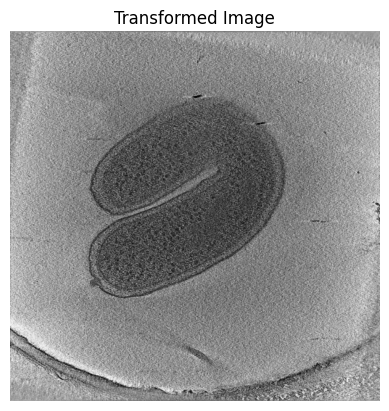

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Apply the transform to the image
transformed_tensor = transform(img)  # shape: [3, 600, 600]

# Unnormalize
mean = torch.tensor([0.485, 0.456, 0.406]).reshape(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).reshape(3, 1, 1)
unnormalized = transformed_tensor * std + mean  # [3, 600, 600]

# Convert to [H, W, C] format and numpy
img_np = unnormalized.permute(1, 2, 0).numpy()
img_np = np.clip(img_np, 0, 1)  # Ensure valid pixel range

# Plot
plt.imshow(img_np)
plt.title("Transformed Image")
plt.axis('off')
plt.show()

In [19]:
import matplotlib.pyplot as plt

print(img.shape)
plt.imshow(img)
plt.title("Resized Input to Model")
plt.show()

AttributeError: 'Image' object has no attribute 'shape'

In [ ]:
from pytorch_grad_cam import GradCAM
target_layer = model.blocks[3]  # or use model.feature_info[2]['module']
cam = GradCAM(model=model, target_layers=[target_layer], use_cuda=True)

In [ ]:
import torch
import timm
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

def run_timm_gradcam(img_path, model_name='efficientnet_b0', target_layer_idx=3):
    # Load EfficientNet from timm
    model = timm.create_model(model_name, pretrained=True)
    model.eval()

    # Select the target layer (e.g., model.blocks[3])
    target_layer = model.blocks[target_layer_idx]

    # Preprocess image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    img = Image.open(img_path).convert("RGB")
    input_tensor = transform(img).unsqueeze(0)

    # Convert image to float32 numpy for overlay
    img_np = np.array(img.resize((224, 224))).astype(np.float32) / 255.0

    # Setup Grad-CAM
    cam = GradCAM(model=model, target_layers=[target_layer], use_cuda=torch.cuda.is_available())
    targets = [ClassifierOutputTarget(0)]  # Optional: dummy target for CAM

    # Run CAM
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)[0]  # Take first image
    cam_overlay = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

    # Show result
    plt.imshow(cam_overlay)
    plt.axis('off')
    plt.title(f'Grad-CAM - Layer {target_layer_idx}')
    plt.show()


## GramCam for B5 Head

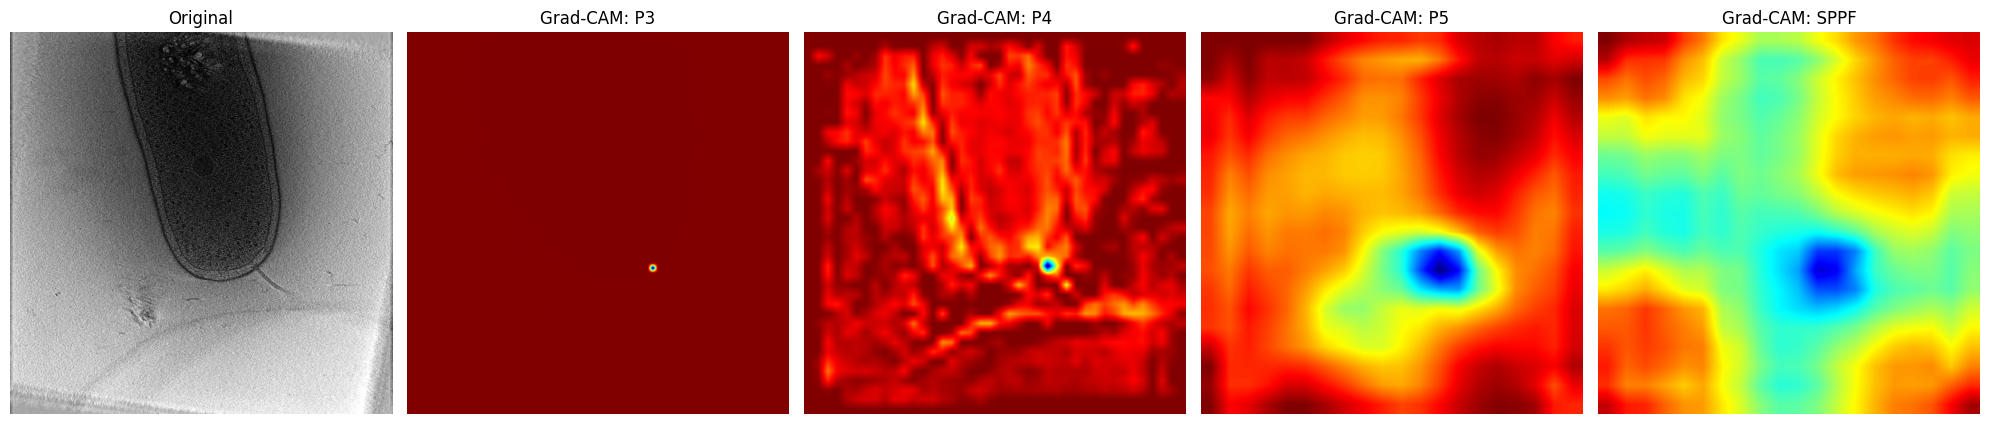

In [27]:
import torch
import numpy as np
import cv2
from torchvision.transforms import ToTensor, Normalize, Resize, Compose
from PIL import Image
import matplotlib.pyplot as plt

def preprocess_image(image_path, img_size=640):
    image = Image.open(image_path).convert("RGB")
    transform = Compose([
        Resize((img_size, img_size)),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    tensor = transform(image).unsqueeze(0)
    tensor.requires_grad_()  # ✅ Enable gradients
    return tensor, np.array(image.resize((img_size, img_size)))

def show_cam_on_image(img: np.ndarray, mask: np.ndarray, alpha=0.5):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img) / 255
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

class GradCAM:
    def __init__(self, model, target_layers):
        self.model = model
        self.target_layers = target_layers
        self.gradients = {}
        self.activations = {}

        # Hook setup
        for name, module in self.target_layers.items():
            module.register_forward_hook(self._save_activation(name))
            module.register_full_backward_hook(self._save_gradient(name))

    def _save_activation(self, name):
        def hook(module, input, output):
            self.activations[name] = output.detach()
        return hook

    def _save_gradient(self, name):
        def hook(module, grad_input, grad_output):
            self.gradients[name] = grad_output[0].detach()
        return hook

    def __call__(self, input_tensor, class_idx=0, layer_name='P5'):
        self.model.zero_grad()
        output = self.model(input_tensor)[0]  # assuming model returns a list of outputs
        score = output[..., 4].max()  # assuming confidence at index 4
        score.backward(retain_graph=True)

        grads = self.gradients[layer_name]          # [B, C, H, W]
        activations = self.activations[layer_name]  # [B, C, H, W]
        weights = grads.mean(dim=(2, 3), keepdim=True)  # GAP over spatial dimensions

        cam = (weights * activations).sum(dim=1, keepdim=True)
        cam = torch.relu(cam)
        cam = cam.squeeze().cpu().numpy()
        cam = cv2.resize(cam, (input_tensor.shape[-1], input_tensor.shape[-2]))
        cam = (cam - cam.min()) / (cam.max() + 1e-8)
        return cam
    
# --- Usage ---
# Load YOLO model correctly
model_009_merge_159 = os.path.join(yolo_weights_dir, "shared_010_scaled_b5_16_102_54", "weights", "best.pt")
yolo = YOLO(model_009_merge_159)
model = yolo.model  # ✅ this is the raw PyTorch model

target_layers = {
    'P3': model.model[1],
    'P4': model.model[2],
    'P5': model.model[3],
    'SPPF': model.model[4],
}

grad_cam = GradCAM(model, target_layers)
sample_images = os.path.join(yolo_dataset_dir, "images", "shared_009", "train", "BYU_007_100_tomo_1ab322_z0066_y0580_x0590_w0928_h0960_r070.jpg")
img_tensor, raw_img = preprocess_image(sample_images)
import matplotlib.pyplot as plt

# Collect all CAM results
cam_results = []
layer_names = list(target_layers.keys())

for name in layer_names:
    cam_map = grad_cam(img_tensor, layer_name=name)
    cam_result = show_cam_on_image(raw_img / 255.0, cam_map)
    cam_results.append(cam_result)

# Show original + 4 Grad-CAMs in one row
plt.figure(figsize=(20, 5))
titles = ['Original'] + [f"Grad-CAM: {name}" for name in layer_names]

# Show original image
plt.subplot(1, 5, 1)
plt.imshow(raw_img)
plt.title('Original')
plt.axis('off')

# Show CAM overlays
for i, cam in enumerate(cam_results):
    plt.subplot(1, 5, i + 2)
    plt.imshow(cam)
    plt.title(titles[i + 1])
    plt.axis('off')

plt.tight_layout()
plt.show()




🔍 P3 torch.Size([1, 64, 80, 80]) — Raw First N Channels


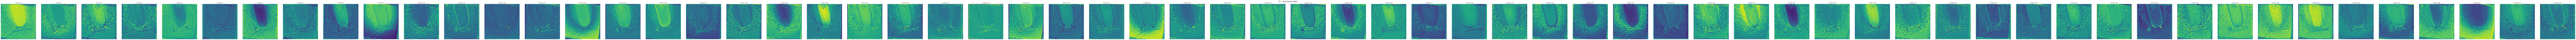

🔥 P3 torch.Size([1, 64, 80, 80]) — Top-K Weighted Channels


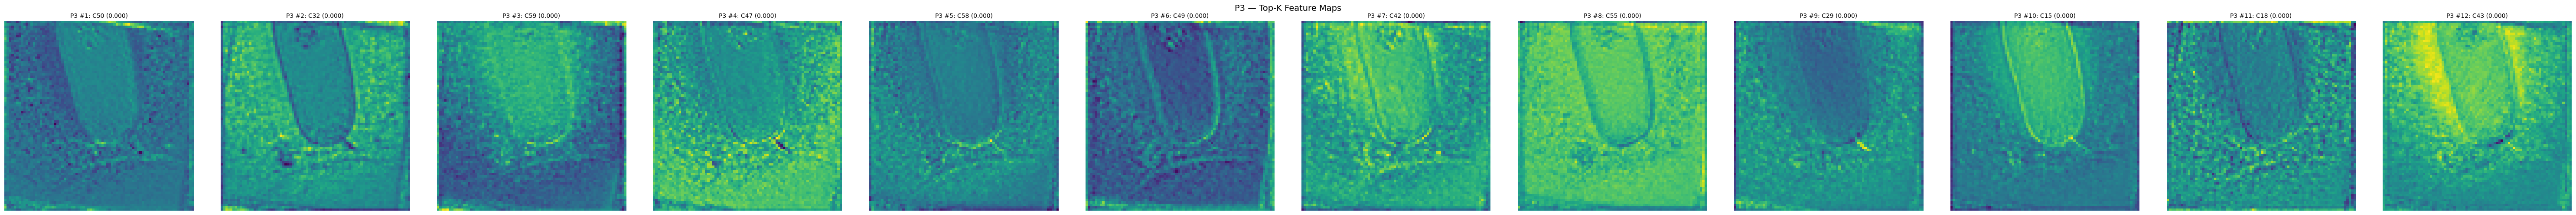

🔍 P4 torch.Size([1, 176, 40, 40]) — Raw First N Channels


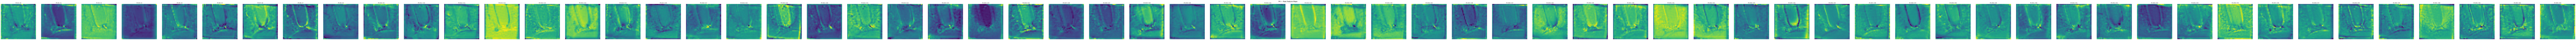

🔥 P4 torch.Size([1, 176, 40, 40]) — Top-K Weighted Channels


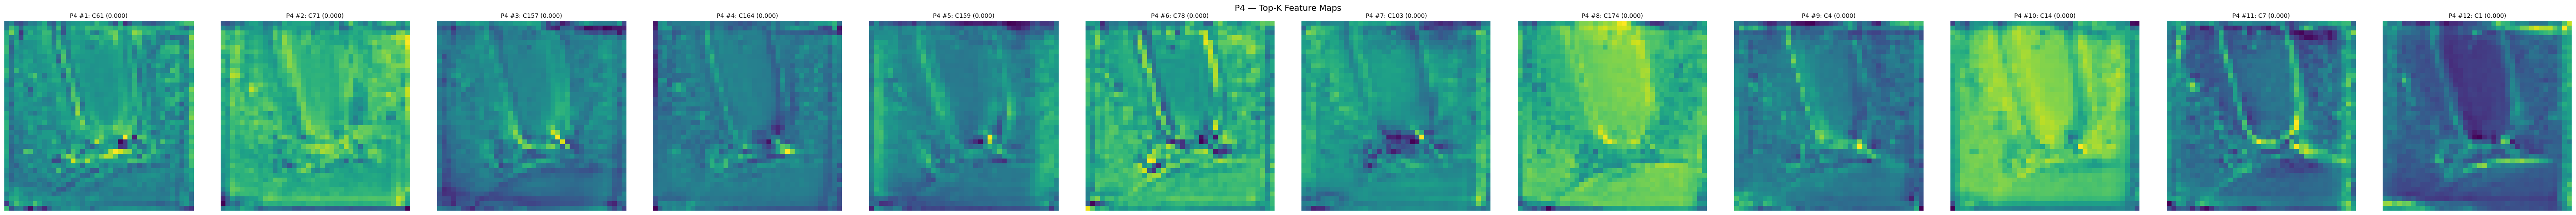

🔍 P5 torch.Size([1, 512, 20, 20]) — Raw First N Channels


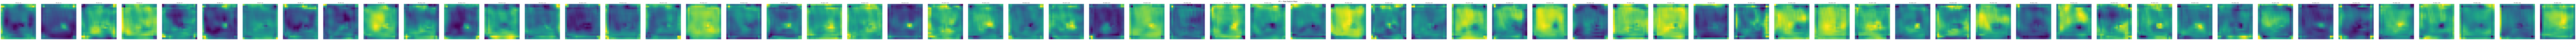

🔥 P5 torch.Size([1, 512, 20, 20]) — Top-K Weighted Channels


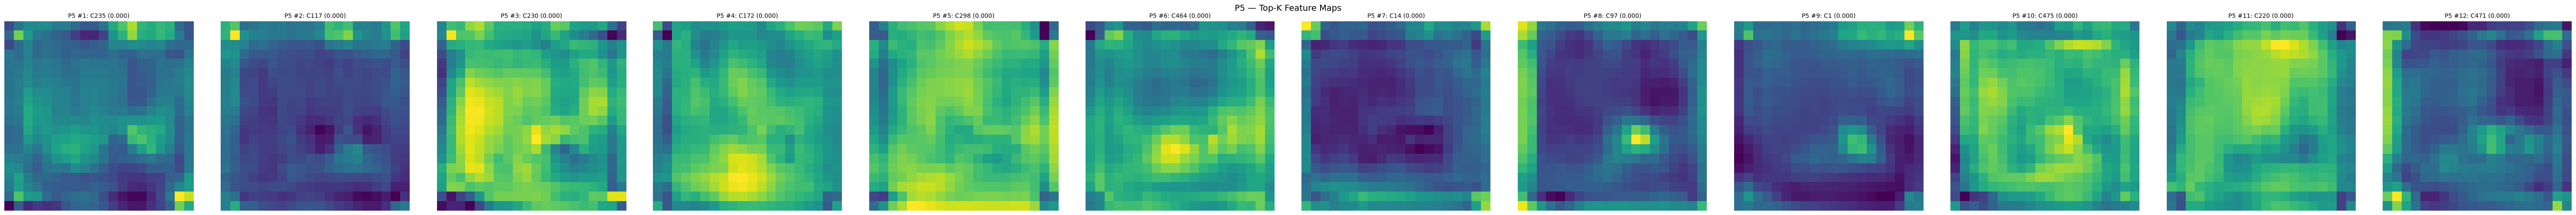

🔍 SPPF torch.Size([1, 512, 20, 20]) — Raw First N Channels


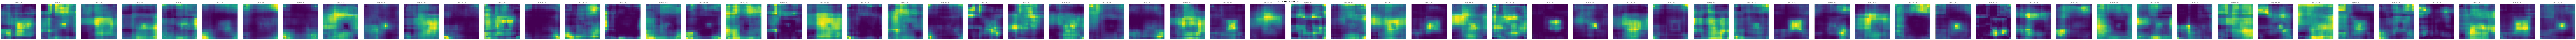

🔥 SPPF torch.Size([1, 512, 20, 20]) — Top-K Weighted Channels


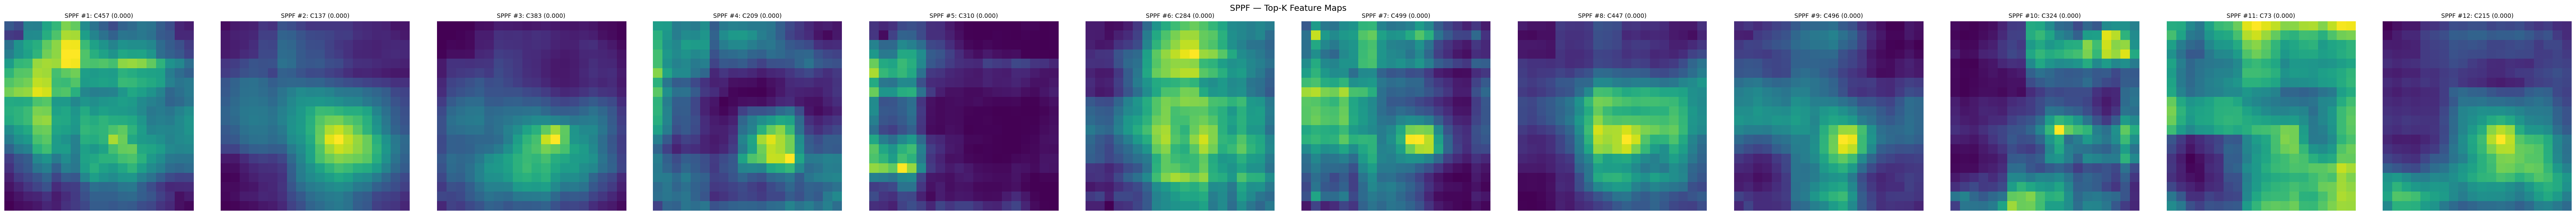

In [26]:
import matplotlib.pyplot as plt
import torch

def visualize_feature_maps_ranked(feature_map, gradients=None, max_channels=8, title_prefix=""):
    """
    Visualizes feature maps.
    If gradients are provided, shows top-k channels sorted by importance.
    Otherwise, shows the first max_channels in order.
    """
    fmap = feature_map.squeeze(0).detach().cpu()  # [C, H, W]
    C, H, W = fmap.shape

    if gradients is not None:
        grads = gradients.squeeze(0).detach().cpu()  # [C, H, W]
        weights = grads.mean(dim=(1, 2))             # importance weights
        topk_vals, topk_idx = torch.topk(weights, k=max_channels)
        indices = topk_idx.tolist()
        scores = topk_vals.tolist()
        mode = "Top-K"
    else:
        indices = list(range(min(C, max_channels)))
        scores = [None] * len(indices)
        mode = "Raw"

    # Plot
    plt.figure(figsize=(5 * len(indices), 5))
    for i, c in enumerate(indices):
        fmap_c = fmap[c]
        fmap_c = (fmap_c - fmap_c.min()) / (fmap_c.max() - fmap_c.min() + 1e-6)

        title = f"{title_prefix} #{i+1}: C{c}"
        if scores[i] is not None:
            title += f" ({scores[i]:.3f})"

        plt.subplot(1, len(indices), i + 1)
        plt.imshow(fmap_c, cmap='viridis')
        plt.title(title, fontsize=10)
        plt.axis('off')
    plt.suptitle(f"{title_prefix} — {mode} Feature Maps", fontsize=14)
    plt.tight_layout()
    plt.show()


_ = model(img_tensor)  # forward pass

# Display all layers in both raw and top-K mode
for name in ['P3', 'P4', 'P5', 'SPPF']:
    fmap = grad_cam.activations[name]
    grads = grad_cam.gradients.get(name)

    print(f"🔍 {name} {fmap.shape} — Raw First N Channels")
    visualize_feature_maps_ranked(fmap, gradients=None, max_channels=64, title_prefix=name)

    print(f"🔥 {name} {fmap.shape} — Top-K Weighted Channels")
    visualize_feature_maps_ranked(fmap, gradients=grads, max_channels=12, title_prefix=name)